## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

In [1]:
#dependencies
import random
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config import *
import requests
from pprint import pprint
from citipy import citipy
import matplotlib as mpl

In [2]:
#generate cities list
#longitude (-180,180), latitude (-90,90)
def city_gen(cities, countries):
    '''
    Returns a list of randomly generated lat, lng coordinates and closest city
    '''
    lat, lng = random.uniform(-90, 90), random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    city_name = city.city_name.title()
    country = city.country_code.upper()
    
    if city_name in cities and country in countries:
        #print(f'Found duplicate: {city_name},{country}')
        city_marker = city_gen(cities, countries)[2]
    else:
        city_marker = city_name+','+country
        #print(f'returning {city_marker}')
    return [lat, lng, city_marker]

In [3]:
#request current weather
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#set up number of cities to query
iterator = 1
number_of_cities = 500

#set up lists for storing results
lat = []
lng = []
temp = []
cities = []
countries = []
humidity = []
cloudiness = []
windspeed =[]

#set up text formatting
bold = "\033[1m"
reset = "\033[0;0m"

while iterator <= number_of_cities:
    print(bold + f'Requesting weather for city # {iterator}' + reset)
    #generate random city
    city_g = city_gen(cities, countries)
    
    r = requests.get(query_url + city_g[2])
    print(f'   requested URL: {r.url}')
    
    if r.status_code == 200:
        response = r.json()
        #pprint(response)
        try:
            city = response['name']
            country = response['sys']['country']
            #make sure city is unique
            if  city in cities and country in countries:
                print(f'   {city}, {country} has already been added, retrying with different city...\n')
            else:
                print('   recording weather for ' + bold + f'{city}, {country}' + reset + '\n')
                temp.append(response['main']['temp'])
                lat.append(response['coord']['lat'])
                lng.append(response['coord']['lon'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['wind']['speed'])
                windspeed.append(response['clouds']['all'])
                cities.append(city)
                countries.append(country)
                iterator += 1
        except KeyError:
            print('Key is not found')
    elif r.status_code == 404:
        print('   city not found, retrying with different city... \n')
        
print(bold + f'Recorded weather for {len(cities)} cities.' + reset)

Requesting weather for city # 1
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ushuaia,AR
   recording weather for Ushuaia, AR

Requesting weather for city # 2
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Illoqqortoormiut,GL
   city not found, retrying with different city... 

Requesting weather for city # 2
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found, retrying with different city... 

Requesting weather for city # 2
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Praia,CV
   recording weather for Praia, CV

Requesting weather for city # 3
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sain

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Puerto%20Ayora,EC
   recording weather for Puerto Ayora, EC

Requesting weather for city # 35
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Hobart,AU
   recording weather for Hobart, AU

Requesting weather for city # 36
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kisangani,CD
   recording weather for Kisangani, CD

Requesting weather for city # 37
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kapaa,US
   recording weather for Kapaa, US

Requesting weather for city # 38
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Albany,AU
   recording weather for Albany, AU

Requesting

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mastic%20Beach,US
   recording weather for Mastic Beach, US

Requesting weather for city # 65
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Port%20Elizabeth,ZA
   recording weather for Port Elizabeth, ZA

Requesting weather for city # 66
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found, retrying with different city... 

Requesting weather for city # 66
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Awbari,LY
   recording weather for Awbari, LY

Requesting weather for city # 67
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Manono,CD
   recording wea

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Castro,CL
   recording weather for Castro, CL

Requesting weather for city # 91
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Amderma,RU
   city not found, retrying with different city... 

Requesting weather for city # 91
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ouesso,CG
   recording weather for Ouesso, CG

Requesting weather for city # 92
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mar%20Del%20Plata,AR
   Mar del Plata, AR has already been added, retrying with different city...

Requesting weather for city # 92
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Nemuro

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Gazanjyk,TM
   recording weather for Gazanjyk, TM

Requesting weather for city # 118
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Salto,UY
   recording weather for Salto, UY

Requesting weather for city # 119
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Skjervoy,NO
   recording weather for Skjervoy, NO

Requesting weather for city # 120
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Acuitzio,MX
   recording weather for Acuitzio, MX

Requesting weather for city # 121
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kenai,US
   recording weather for Kenai, US

Requesting weath

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Burica,PA
   city not found, retrying with different city... 

Requesting weather for city # 146
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sentyabrskiy,RU
   city not found, retrying with different city... 

Requesting weather for city # 146
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Isangel,VU
   recording weather for Isangel, VU

Requesting weather for city # 147
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Vestmannaeyjar,IS
   recording weather for Vestmannaeyjar, IS

Requesting weather for city # 148
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Taolanaro,MG
  

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Georgetown,SH
   recording weather for Georgetown, SH

Requesting weather for city # 171
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Port%20Hardy,CA
   recording weather for Port Hardy, CA

Requesting weather for city # 172
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Samusu,WS
   city not found, retrying with different city... 

Requesting weather for city # 172
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Barentsburg,SJ
   city not found, retrying with different city... 

Requesting weather for city # 172
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Palabuhanratu,ID

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Belokurikha,RU
   recording weather for Belokurikha, RU

Requesting weather for city # 195
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Volterra,IT
   recording weather for Volterra, IT

Requesting weather for city # 196
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Lakes%20Entrance,AU
   recording weather for Lakes Entrance, AU

Requesting weather for city # 197
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ponta%20Do%20Sol,CV
   recording weather for Ponta do Sol, CV

Requesting weather for city # 198
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Batagay-Alyta,RU
   rec

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Taujica,HN
   recording weather for Taujica, HN

Requesting weather for city # 224
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Plettenberg%20Bay,ZA
   recording weather for Plettenberg Bay, ZA

Requesting weather for city # 225
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Warwick,AU
   recording weather for Warwick, AU

Requesting weather for city # 226
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Codrington,AG
   city not found, retrying with different city... 

Requesting weather for city # 226
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Belushya%20Guba,RU
   city 

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Walcz,PL
   recording weather for Walcz, PL

Requesting weather for city # 247
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sabzevar,IR
   recording weather for Sabzevar, IR

Requesting weather for city # 248
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bonthe,SL
   recording weather for Bonthe, SL

Requesting weather for city # 249
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Coihueco,CL
   recording weather for Coihueco, CL

Requesting weather for city # 250
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Pelym,RU
   recording weather for Pelym, RU

Requesting weather f

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Fort%20Saint%20James,CA
   recording weather for Fort Saint James, CA

Requesting weather for city # 278
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Pangnirtung,CA
   recording weather for Pangnirtung, CA

Requesting weather for city # 279
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Susanville,US
   recording weather for Susanville, US

Requesting weather for city # 280
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bulgan,MN
   recording weather for Bulgan, MN

Requesting weather for city # 281
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found,

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ambon,ID
   recording weather for Ambon, ID

Requesting weather for city # 302
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found, retrying with different city... 

Requesting weather for city # 302
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Marsh%20Harbour,BS
   recording weather for Marsh Harbour, BS

Requesting weather for city # 303
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Touros,BR
   recording weather for Touros, BR

Requesting weather for city # 304
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Barentsburg,SJ
   city not found, retryi

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Solomenskoye,RU
   recording weather for Solomenskoye, RU

Requesting weather for city # 327
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Wagar,SD
   recording weather for Wagar, SD

Requesting weather for city # 328
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Dalvik,IS
   recording weather for Dalvik, IS

Requesting weather for city # 329
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mataura,PF
   city not found, retrying with different city... 

Requesting weather for city # 329
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Nouadhibou,MR
   recording weather for Nouad

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ixtapa,MX
   recording weather for Ixtapa, MX

Requesting weather for city # 355
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Garowe,SO
   recording weather for Garowe, SO

Requesting weather for city # 356
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Wahran,DZ
   city not found, retrying with different city... 

Requesting weather for city # 356
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Harper,LR
   recording weather for Harper, LR

Requesting weather for city # 357
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Maniitsoq,GL
   recording weather for Maniitsoq, GL

Re

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ostersund,SE
   recording weather for Ostersund, SE

Requesting weather for city # 380
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Jiuquan,CN
   recording weather for Jiuquan, CN

Requesting weather for city # 381
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Westerly,US
   recording weather for Westerly, US

Requesting weather for city # 382
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ridgecrest,US
   recording weather for Ridgecrest, US

Requesting weather for city # 383
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sao%20Jose%20Da%20Coroa%20Grande,BR
   recording we

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Banjarmasin,ID
   recording weather for Banjarmasin, ID

Requesting weather for city # 408
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Bowen,AU
   recording weather for Bowen, AU

Requesting weather for city # 409
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Magrath,CA
   recording weather for Magrath, CA

Requesting weather for city # 410
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Masuri,IN
   city not found, retrying with different city... 

Requesting weather for city # 410
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Dzhusaly,KZ
   city not found, retrying with 

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Taolanaro,MG
   city not found, retrying with different city... 

Requesting weather for city # 432
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Sergeyevka,KZ
   recording weather for Sergeyevka, KZ

Requesting weather for city # 433
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Rafaela,AR
   recording weather for Rafaela, AR

Requesting weather for city # 434
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Kawalu,ID
   recording weather for Kawalu, ID

Requesting weather for city # 435
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Asyut,EG
   recording weather for Asyut, E

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Nuevo%20Progreso,MX
   recording weather for Nuevo Progreso, MX

Requesting weather for city # 457
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Brae,GB
   recording weather for Brae, GB

Requesting weather for city # 458
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Swift%20Current,CA
   recording weather for Swift Current, CA

Requesting weather for city # 459
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Mys%20Shmidta,RU
   city not found, retrying with different city... 

Requesting weather for city # 459
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Galiwinku,AU
   ci

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Tumannyy,RU
   city not found, retrying with different city... 

Requesting weather for city # 480
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Ponta%20Do%20Sol,PT
   Ponta do Sol, PT has already been added, retrying with different city...

Requesting weather for city # 480
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Marrakesh,MA
   recording weather for Marrakesh, MA

Requesting weather for city # 481
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Samusu,WS
   city not found, retrying with different city... 

Requesting weather for city # 481
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9e

   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Taolanaro,MG
   city not found, retrying with different city... 

Requesting weather for city # 500
   requested URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=Deloraine,CA
   recording weather for Deloraine, CA

Recorded weather for 500 cities.


In [4]:
#create df
cities_dict = {
    'City':cities,
    'Country':countries,
    'Latitude':lat,
    'Longitude':lng,
    'Temperature, '+units:temp,
    'Humidity':humidity,
    'Wind Speed MPH':windspeed,
    'Clouds':cloudiness
}
cities_df = pd.DataFrame(cities_dict)

#check if there are no duplicated cities
cities_df[cities_df.duplicated(subset='City', keep=False).values]

,City,Clouds,Country,Humidity,Latitude,Longitude,"Temperature, imperial",Wind Speed MPH


In [5]:
cities_df.head()

,City,Clouds,Country,Humidity,Latitude,Longitude,"Temperature, imperial",Wind Speed MPH
0,Ushuaia,16.11,AR,80,-54.81,-68.31,41.00,75
1,Praia,17.22,CV,68,14.92,-23.51,68.00,75
2,Saint-Philippe,3.36,RE,66,-21.36,55.77,84.20,0
3,Longyearbyen,18.34,SJ,60,78.22,15.64,8.60,20
4,Jamestown,14.67,SH,100,-15.94,-5.72,74.27,76


In [6]:
#save df to CSV
cities_df.to_csv('weather_data.csv')

# Temperature (F) vs. Latitude

/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


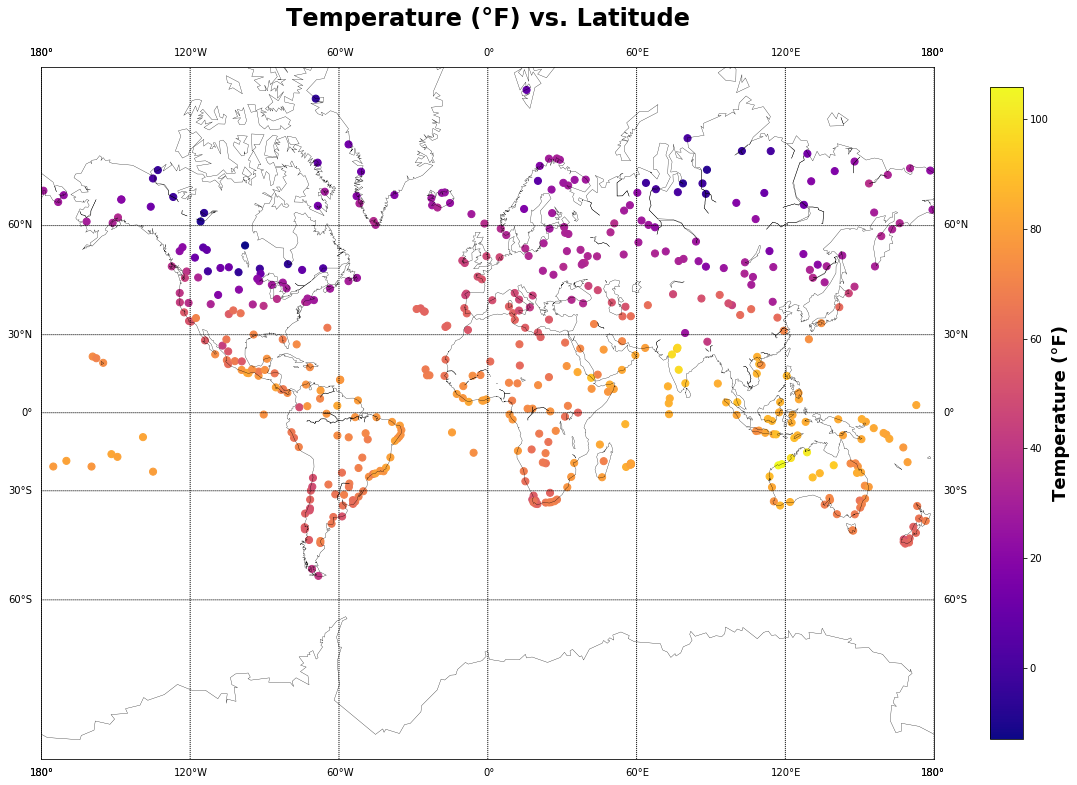

In [7]:
# plot initial coordinates to see how the pick is spread
f, ax = plt.subplots(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.3)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,1,1])

#create coordinates
lng = cities_df['Longitude'].values
lat = cities_df['Latitude'].values
temps = cities_df['Temperature, imperial'].values
x,y= m(lng, lat)

cax = m.scatter(x,y, latlon=False, c=temps, s=50, cmap='plasma', alpha=1)
cbar = f.colorbar(cax, shrink=0.8)
cbar.set_label('Temperature (°F)', fontsize=18, weight='bold')

plt.title('Temperature (°F) vs. Latitude', fontsize=24, position=(0.5,1.05), weight='bold')
plt.show()

# Humidity (%) vs. Latitude

/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


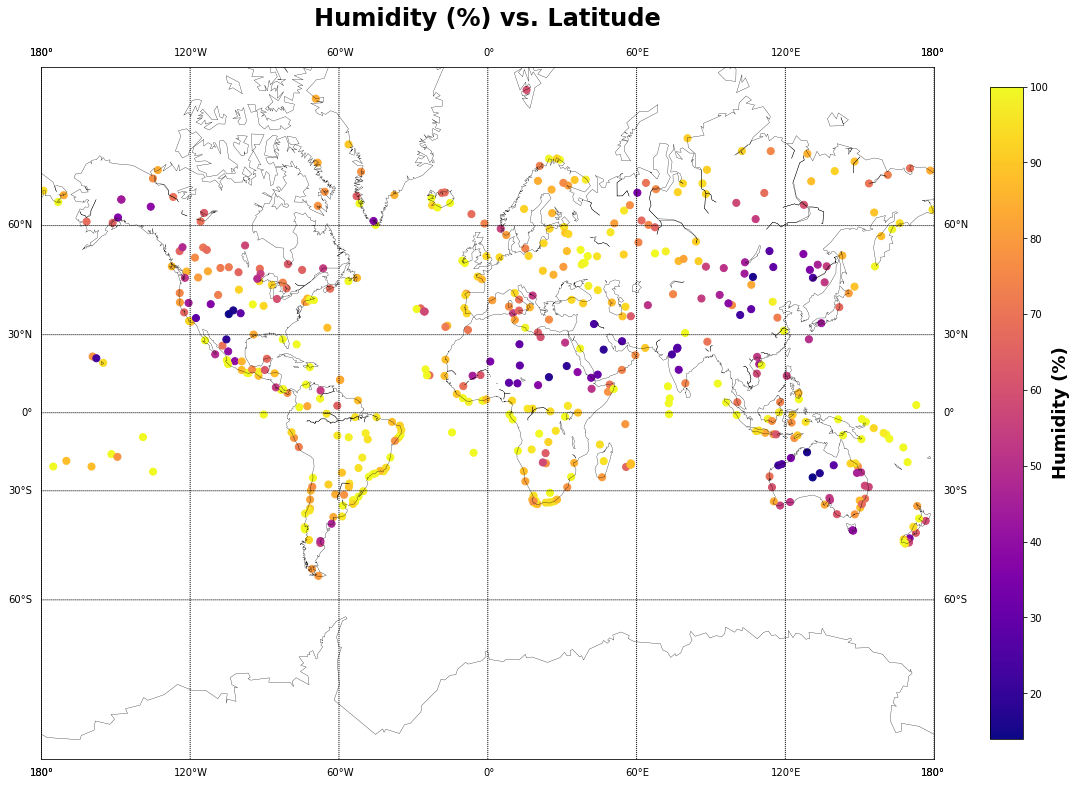

In [8]:
# plot initial coordinates to see how the pick is spread
f, ax = plt.subplots(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.3)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,1,1])

#create coordinates
lng = cities_df['Longitude'].values
lat = cities_df['Latitude'].values
humidity = cities_df['Humidity'].values
x,y= m(lng, lat)

cax = m.scatter(x,y, latlon=False, c=humidity, s=50, cmap='plasma', alpha=1)
cbar = f.colorbar(cax, shrink=0.8)
cbar.set_label('Humidity (%)', fontsize=18, weight='bold')

plt.title('Humidity (%) vs. Latitude', fontsize=24, position=(0.5,1.05), weight='bold')
plt.show()

# Cloudiness (%) vs. Latitude

/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


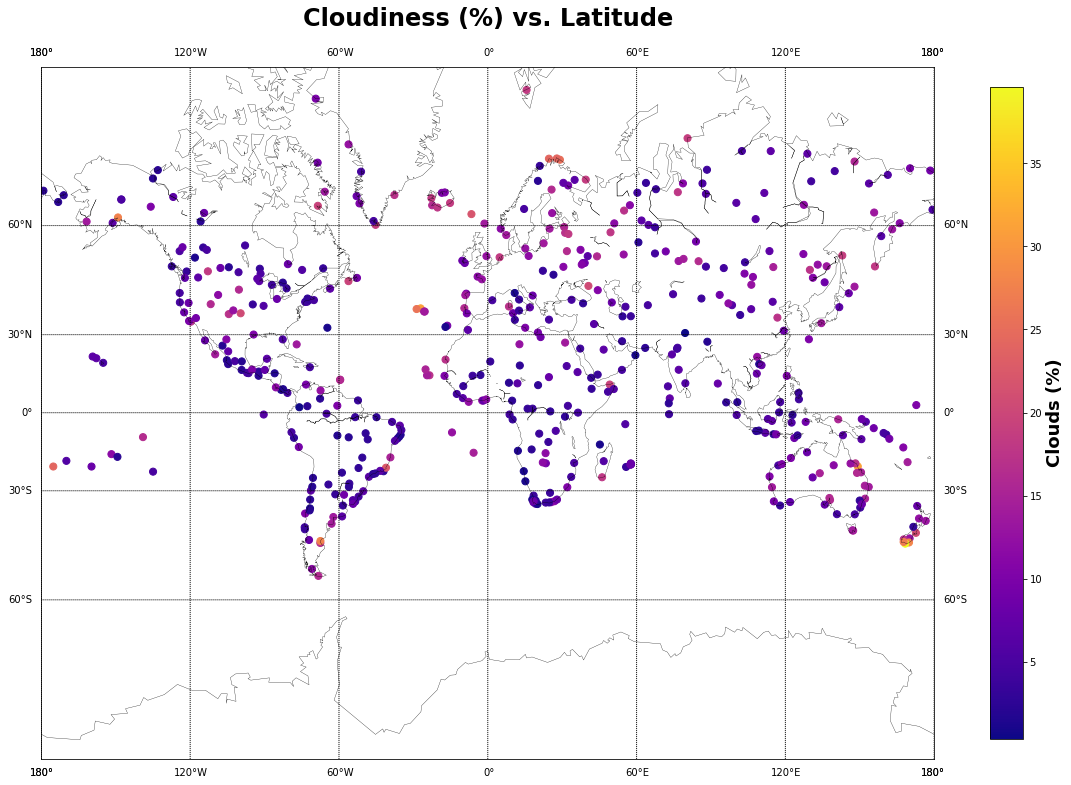

In [9]:
# plot initial coordinates to see how the pick is spread
f, ax = plt.subplots(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.3)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,1,1])

#create coordinates
lng = cities_df['Longitude'].values
lat = cities_df['Latitude'].values
clouds = cities_df['Clouds'].values
x,y= m(lng, lat)

cax = m.scatter(x,y, latlon=False, c=clouds, s=50, cmap='plasma', alpha=1)
cbar = f.colorbar(cax, shrink=0.8)
cbar.set_label('Clouds (%)', fontsize=18, weight='bold')

plt.title('Cloudiness (%) vs. Latitude', fontsize=24, position=(0.5,1.05), weight='bold')
plt.show()

# Wind Speed (mph) vs. Latitude

/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yegor/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


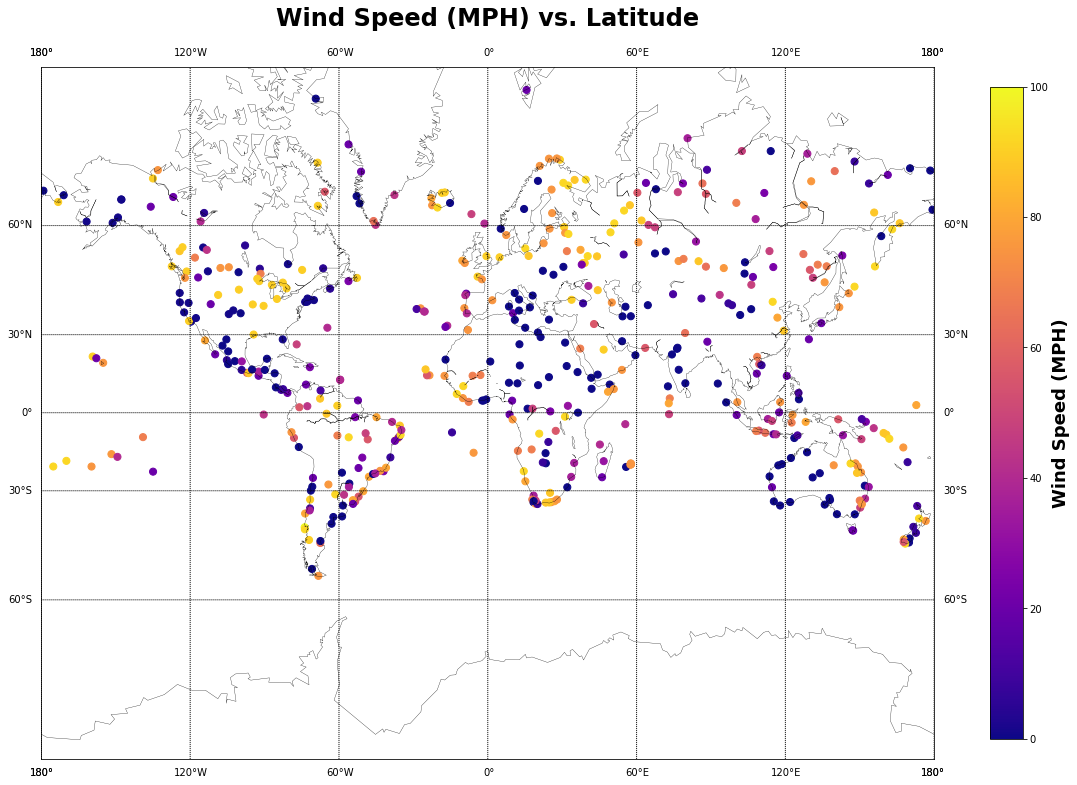

In [10]:
# plot initial coordinates to see how the pick is spread
f, ax = plt.subplots(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c', ax=ax)
m.drawcoastlines(linewidth=0.3)

# draw parallels and meridians
m.drawparallels(np.arange(-90.,91.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0,0,1,1])

#create coordinates
lng = cities_df['Longitude'].values
lat = cities_df['Latitude'].values
wind = cities_df['Wind Speed MPH'].values
x,y= m(lng, lat)

cax = m.scatter(x,y, latlon=False, c=wind, s=50, cmap='plasma', alpha=1)
cbar = f.colorbar(cax, shrink=0.8)
cbar.set_label('Wind Speed (MPH)', fontsize=18, weight='bold')

plt.title('Wind Speed (MPH) vs. Latitude', fontsize=24, position=(0.5,1.05), weight='bold')
plt.show()

# Trends
* Temperatures are higher around equator
* Humidity is higher alongside cost lines and big rivers
* Amount of clouds is about the same around the globe
* Wind speed seems to be all over